# MySQL Python connector examples
## Setting up connection

In [18]:
import mysql.connector as sql

conn = sql.connect(host='localhost', user='root', password='1qaz2wsx', database='university2')

cursor = conn.cursor()

## Reading

In [2]:
cursor.execute("SELECT first_name, last_name FROM students LIMIT 3")
cursor.fetchall()

[('Назарій', 'Бачинський'), ('Микола', 'Біляєв'), ('Олександр', 'Вайтович')]

In [3]:
cursor.fetchall()

InterfaceError: No result set to fetch from.

In [4]:
cursor.execute("SELECT first_name, last_name FROM students LIMIT 3")

In [5]:
while True:
    r = cursor.fetchone()
    if not r: break
    print(r)

('Назарій', 'Бачинський')
('Микола', 'Біляєв')
('Олександр', 'Вайтович')


In [8]:
type(cursor.fetchone())

NoneType

## Writing

In [14]:
cursor.execute("INSERT INTO cohorts (name) VALUES ('CS3')")
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

[(1, 'CS1'), (2, 'CS2'), (3, 'BA'), (5, 'CS3')]

In [15]:
cursor.execute("UPDATE cohorts SET name='CCS1' WHERE id=1")
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

[(1, 'CCS1'), (2, 'CS2'), (3, 'BA'), (5, 'CS3')]

In [16]:
conn.commit()

In [17]:
conn.close()

In [19]:
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

[(1, 'CCS1'), (2, 'CS2'), (3, 'BA'), (5, 'CS3')]

## Do not forgot to commit your changes

In [ ]:
conn.rollback()

In [ ]:
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

## Parameters

In [20]:
sql.paramstyle

'pyformat'

In [23]:
# how to get resulting id?
cursor.execute("INSERT INTO cohorts (name) VALUES (%s)", ("blabla",))

In [28]:
cursor.lastrowid

7

In [24]:
cursor.fetchone()

In [22]:
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

[(1, 'CCS1'), (2, 'CS2'), (3, 'BA'), (5, 'CS3'), (6, 'blabla')]

## Writing multiple entities

In [30]:
cursor.executemany("INSERT INTO cohorts (name) VALUES (%s)", [('CS5',), ('CS6',), ('BA2',)])

In [31]:
cursor.execute("SELECT * FROM cohorts")
cursor.fetchall()

[(1, 'CCS1'),
 (2, 'CS2'),
 (3, 'BA'),
 (5, 'CS3'),
 (6, 'blabla'),
 (7, 'blabla'),
 (8, 'CS5'),
 (9, 'CS6'),
 (10, 'BA2'),
 (11, 'CS5'),
 (12, 'CS6'),
 (13, 'BA2')]

## Description and row factory

In [32]:
cursor.execute("SELECT * FROM students LIMIT 3")
cursor.fetchall()

[(1, 'Назарій', 'Бачинський', 0, 1, None, None),
 (2, 'Микола', 'Біляєв', 0, 1, None, None),
 (3, 'Олександр', 'Вайтович', 1, 1, None, None)]

In [33]:
cursor.description

[('id', 3, None, None, None, None, 0, 16899),
 ('first_name', 253, None, None, None, None, 0, 4097),
 ('last_name', 253, None, None, None, None, 0, 4097),
 ('dormitory', 1, None, None, None, None, 0, 4097),
 ('cohort_id', 3, None, None, None, None, 0, 20489),
 ('pet_id', 3, None, None, None, None, 1, 16392),
 ('transport_type_id', 3, None, None, None, None, 1, 16392)]

In [34]:
cursor.column_names

('id',
 'first_name',
 'last_name',
 'dormitory',
 'cohort_id',
 'pet_id',
 'transport_type_id')

In [36]:
cursor.execute("SELECT * FROM students LIMIT 1")
dict(zip(cursor.column_names, cursor.fetchone()))

{'id': 1,
 'first_name': 'Назарій',
 'last_name': 'Бачинський',
 'dormitory': 0,
 'cohort_id': 1,
 'pet_id': None,
 'transport_type_id': None}

## Use pandas to deal with large amounts of data in-memory

In [39]:
conn = sql.connect(host='localhost', user='root', password='1qaz2wsx', database='kaggle')

cursor = conn.cursor()

In [41]:
cursor.execute("SHOW TABLES;")
cursor.fetchall()

InternalError: Unread result found

In [42]:
cursor.fetchall()

[('noshow',)]

In [43]:
import pandas as pd

In [44]:
df = pd.read_sql("SELECT * FROM noshow", conn)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921800e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


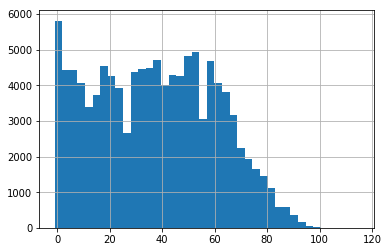

In [49]:
%matplotlib inline
df.Age.hist(bins=40)

## Do not forget to close connection

In [50]:
conn.close()